### Z Confidence Intervals With Sample Means

**Definition:** Confidence intervals of sample means can give us information on the population mean of data when we acquire a single sample of data and know the population standard deviation, but not the corresponding mean. We take our single sample mean and use it to get a range of values with the following formula: **Confidence interval bounds = sample mean +- (z star * standard error)**. We already know the formula for standard error from before, and we get z star by locating the corresponding z-value (using the z-score table) of probability halfway between our desired confidence level and 100% to account for both tails of the normal distribution. For example, if we want a 95% confidence interval, which is standard, we locate the z_value corresponding to 0.975, which is 1.96. With the two bounds we get from the formula, we can be 95% (or any desired confidence level) confident that the true population mean lies between the two values.

**Why It's Useful:** It is rare that we know the population standard deviation without knowing the population mean, but when this does happen, it's useful to estimate the interval containing the population mean with some degree of certaintly. Typically, this degree is 95%. Perhaps we acquire a mean of a sample of titanic passenger ages, and want to know the certainty that the true mean falls in some interval so we can manage the risk of spreading false information.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
diamond_df = sns.load_dataset('diamonds')
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
def central_limit_theorem(n, N,data,col):
    import random
    pop_mean = data[col].mean()
    sample_means = []
    for i in range(N):
        sample_means.append(np.mean(random.sample(list(data[col]),n)))
    mean_sample_means = np.mean(sample_means)
    sns.histplot(sample_means,kde = True)
    print('column name:',col)
    print('population mean :',pop_mean)
    print('mean of sample means:',mean_sample_means)
    print('sample size :',n)
    print('number of samples:',N)     

column name: price
population mean : 3932.799721913237
mean of sample means: 3948.97613
sample size : 100
number of samples: 1000


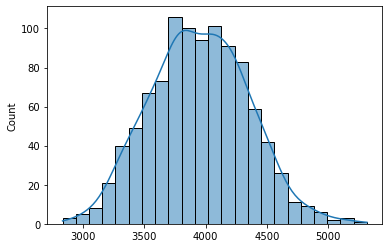

In [4]:
central_limit_theorem(100,1000,diamond_df,'price')

### Confidence Limits
**Confidence interval bounds = sample mean +- (z star * standard error)**

$CI = \bar{x} \pm Z\frac{\alpha}{2} * \frac{\sigma}{\sqrt{n}}$

In [5]:
## Direct calculation
lower_limit,upper_limit = stats.norm.interval(0.025,sample_mean,sample_std)
lower_limit

NameError: name 'sample_mean' is not defined

In [6]:
len(diamond_df.price)

53940

In [7]:
np.mean(diamond_df.price.sample(100))

4192.85

In [8]:
conf = 0.95
n = 100
sample_mean = np.mean(diamond_df.price.sample(100))
sample_std = np.std(diamond_df.price.sample(100)) /np.sqrt(n)

sample_mean, sample_std

(3561.46, 449.8433138538351)

In [9]:
from scipy import stats

In [10]:
z_star = stats.norm.ppf((1-conf)/2 + conf)
z_star

1.959963984540054

In [11]:
lower_limit = sample_mean - (z_star * sample_std)
lower_limit

2679.783306160335

In [12]:
upper_limit = sample_mean + (z_star * sample_std)
upper_limit

4443.136693839665

In [13]:
def confidence_limits(conf, n, data,column): 
    import random
    sample_mean = np.mean(random.sample(list(data[column]), n)) #getting a single sample mean

    standard_error = np.std(data[column]) / np.sqrt(n) #same formula we used previously for SE

    z_star = stats.norm.ppf(((1 - conf) / 2) +conf) #For any confidence level, the probability we want from our z table is halfway between that value and 1 because we just take into account both tails of the distribution

    CI =  sample_mean - (z_star * standard_error), sample_mean + (z_star * standard_error)

    return f"Interpretation: With a sample mean of {round(sample_mean, 2)}, we can be {round(conf * 100, 2)}% confident that the true population mean lies between {round(CI[0], 2)} and {round(CI[1], 2)}."

In [14]:
confidence_limits(0.99, 10000, diamond_df,"price")

'Interpretation: With a sample mean of 3871.05, we can be 99.0% confident that the true population mean lies between 3768.29 and 3973.81.'

In [15]:
np.sqrt(500*.53*.47) *1.645

18.35852428029007

In [16]:
500*.53

265.0

## Hypothesis Testing

The actual test begins by considering two hypotheses. They are called the null hypothesis and the alternative hypothesis. These hypotheses contain opposing viewpoints.

- H0: The null hypothesis: It is a statement about the population that either is believed to be true or is used to put forth an argument unless it can be shown to be incorrect beyond a reasonable doubt.

- Ha: The alternative hypothesis: It is a claim about the population that is contradictory to H0 and what we conclude when we reject H0.

Since the null and alternative hypotheses are contradictory, you must examine evidence to decide if you have enough evidence to reject the null hypothesis or not. The evidence is in the form of sample data.

**Example-1:**

A principal at a certain school claims that the students in his school are above average intelligence. A random sample of thirty students IQ scores have a mean score of 112.5. Is there sufficient evidence to support the principal’s claim? The mean population IQ is 100 with a standard deviation of 15.

In [44]:
pop_mean = 100
pop_std = 15
sample_mean = 112.5
sample_size = 30

def z_test(sample_mean,pop_mean,pop_std,sample_size):
    return (sample_mean - pop_mean) / (pop_std / np.sqrt(sample_size))

In [47]:
z_score = z_test(sample_mean,pop_mean,pop_std,sample_size)

In [55]:
p_val = (1 - stats.norm.cdf(z_score))
np.round(p_val,7)

2.5e-06

In [56]:
if p_val <= 0.01:
    print('Reject Null Hypothesis:')
else:
    print('Accept Null Hypothesis')

Reject Null Hypothesis:


**Example:**

Blood glucose levels for obese patients have a mean of 100 with a standard deviation of 15. A researcher thinks that a diet high in raw cornstarch will have a positive or negative effect on blood glucose levels. A sample of 30 patients who have tried the raw cornstarch diet have a mean glucose level of 140. Test the hypothesis that the raw cornstarch had an effect.



#### Example problem:
Say your friend, told you that he thinks data scientists earn more than 125,000 dollars per year. You doubt him, so you design a test to see who’s right. sample mean is 100000 and std is 200 of 200 observations.

#### Example problem: 

A medical trial is conducted to test whether or not a new medicine reduces cholesterol by 25%. State the null and alternative hypotheses.

2. A factory is producing the bolts with the average diameter 21mm. A random sample pf 25 bolts has a mean diameter 22.6mm and standard deviation 3mm. Can we assune that the sample has been drawn from the population at 5% level of significance

In [31]:
def t_test(x_bar,mu,sample_std,sample_size):
    return (x_bar - mu) / (sample_std/ np.sqrt(sample_size -1 ))

In [32]:
t_score = t_test(22.6, 21,3,25)

In [33]:
t_score

2.6127890589687253

p_val = 1 - cdf(x) - one tailed test

p_val = 2(1 - cdf(x)) - two tailed test

In [58]:
p_val = 2*(1 - stats.t.cdf(t_score,24))

In [61]:
p_val

0.015256495534003767

In [63]:
if p_val <= 0.02:
    print('Reject Null Hypothesis:')
else:
    print('Accept Null Hypothesis')

Reject Null Hypothesis:


**Answer:**

Step 1: State the Null hypothesis. The accepted fact is that the population mean is 100, so: 
- H0: μ <= 100.


Step 2: State the Alternate Hypothesis. The claim is that the students have above average IQ scores, so:
- H1: μ > 100.

The fact that we are looking for scores “greater than” a certain point means that this is a one-tailed test.

In [17]:
sample_mean = 112.5
pop_mean = 100
pop_std = 15
sample_size = 30

def t_score(sample_size, sample_mean,pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denominator = pop_std / np.sqrt(sample_size-1)

    return numerator/denominator

In [18]:
t_score = t_score(sample_size, sample_mean, pop_mean,pop_std)
t_score

4.487637339278753

### p_value = prob(t>t_score) or 1 - prob(t <= t_score) 

In [19]:
p_val = 1-stats.t.cdf(t_score,29)
np.round(p_val,6)

5.3e-05

In [20]:
p_val = 0.000053

In [21]:
if p_val < 0.05:
    print('Reject H0: ')
else:
    print('Failed to Reject H0: The population mean is equal to 18.9')    

Reject H0: 


**Example-2:**

A researcher thinks that if knee surgery patients go to physical therapy twice a week (instead of 3 times), their recovery period will be longer. Average recovery times for knee surgery patients is 8.2 weeks.

**Answer:**

The hypothesis statement in this question is that the researcher believes the average recovery time is more than 8.2 weeks. It can be written in mathematical terms as:
- **H1: μ > 8.2**
 
Next, you’ll need to state the null hypothesis (See: How to state the null hypothesis). That’s what will happen if the researcher is wrong. In the above example, if the researcher is wrong then the recovery time is less than or equal to 8.2 weeks. In math, that’s:
- **H0 μ ≤ 8.2**

**Example:**

Blood glucose levels for obese patients have a mean of 100 with a standard deviation of 15. A researcher thinks that a diet high in raw cornstarch will have a positive or negative effect on blood glucose levels. A sample of 30 patients who have tried the raw cornstarch diet have a mean glucose level of 140. Test the hypothesis that the raw cornstarch had an effect.



- Step 1: State the null hypothesis: H0:μ=100
- Step 2: State the alternate hypothesis: H1:≠100

#### Example problem: 
A sample of 200 people has a mean age of 21 with a population standard deviation (σ) of 5. Test the hypothesis that the population mean is 18.9 at α = 0.05.

H0: the population mean is 18.9
    
H1: the population mean is not equal to 18.9

$ z-score = \frac {\bar{x} - \mu}{\sigma/\sqrt{n}} $

In [22]:
sample_mean = 21
pop_mean = 18.9
pop_std = 5
sample_size = 200

def z_score(sample_size, sample_mean,pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denominator = pop_std / np.sqrt(sample_size)

    return numerator/denominator

In [23]:
z_cal = z_score(200,21,18.9,5)
z_cal

5.9396969619670035

In [24]:
conf = 0.95
z_table = stats.norm.ppf((1-conf)/2 + conf)
z_table

1.959963984540054

### p_val = 1 - cdf(z_cal)

In [25]:
p_val = 2*(1 - stats.norm.cdf(z_cal))
p_val

2.8554942854697174e-09

In [26]:
if z_cal > z_table:
    print('Reject H0: The population mean is not equal to 18.9')
else:
    print('Failed to Reject H0: The population mean is equal to 18.9')    

Reject H0: The population mean is not equal to 18.9


In [27]:
if p_val < 0.05:
    print('Reject H0: The population mean is not equal to 18.9')
else:
    print('Failed to Reject H0: The population mean is equal to 18.9')    

Reject H0: The population mean is not equal to 18.9


#### Example problem: 
Say your friend, told you that he thinks data scientists earn more than 125,000 dollars per year. You doubt him, so you design a test to see who’s right. sample mean is 100000 and std is 200 of 200 observations.

- The Alternative hypothesis of this test would be: The mean data scientist salary is more than 125,000 dollars.

- The Null hypothesis will cover everything else, thus: The mean data scientist salary is less than or equal to 125,000 dollars.

In [28]:
def z_score(sample_size, sample_mean,pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denominator = pop_std / np.sqrt(sample_size)

    return numerator/denominator

In [29]:
z_cal = z_score(200, 100000, 125000,200)
z_cal

-1767.766952966369

In [30]:
conf = 0.95
z_table = stats.norm.ppf(1-conf)
z_table

-1.6448536269514722

In [31]:
if z_cal > z_table:
    print('Reject H0')
else:
    print('Failed to Reject H0')

Failed to Reject H0


In [32]:
z_cal

-1767.766952966369

In [33]:
p_val = 1 - stats.norm.cdf(z_cal)
p_val

1.0

In [34]:
if p_val < 0.05:
    print('Reject H0')
else:
    print('Failed to Reject H0')

Failed to Reject H0


#### Example problem: 

A medical trial is conducted to test whether or not a new medicine reduces cholesterol by 25%. State the null and alternative hypotheses.

- H0 : The drug reduces cholesterol by 25%. p = 0.25

- Ha : The drug does not reduce cholesterol by 25%. p ≠ 0.25

#### Example problem: 
We want to test if it takes fewer than 45 minutes to teach a lesson plan. State the null and alternative hypotheses. Fill in the correct symbol ( =, ≠, ≥, <, ≤, >) for the null and alternative hypotheses.
- H0: μ __ 45 
- Ha:μ __ 45

#### Example problem: 

On a state driver’s test, about 40% pass the test on the first try. We want to test if more than 40% pass on the first try. Fill in the correct symbol (=, ≠, ≥, <, ≤, >) for the null and alternative hypotheses.
- H0: p __ 0.40 
- Ha: p __ 0.40

### Examples of two-sided and one-sided hypotheses
#### Two-sided
A researcher has results for a sample of students who took a national exam at a high school. The researcher wants to know if the scores at that school differ from the national average of 850. A two-sided alternative hypothesis (also known as a nondirectional hypothesis) is appropriate because the researcher is interested in determining whether the scores are either less than or greater than the national average. (H0: μ = 850 vs. H1: μ≠ 850)
#### One-sided
A researcher has exam results for a sample of students who took a training course for a national exam. The researcher wants to know if trained students score above the national average of 850. A one-sided alternative hypothesis (also known as a directional hypothesis) can be used because the researcher is specifically hypothesizing that scores for trained students are greater than the national average. (H0: μ = 850 vs. H1: μ > 850)

#### You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client? (Given that the population std is 0.5)

1. A dice is thrown 900 times and a face of 3 or 5 is observed 335 times. test whether the dice is unbaised.


2. A factory is producing the bolts with the average diameter 21mm. A random sample pf 25 bolts has a mean diameter 22.6mm and standard deviation 3mm. Can we assune that the sample has been drawn from the population at 5% level of significance

Ho: A factory is producing the bolts with the average diameter 21mm.

$\mu = 21mm.$

H1: 
$\mu \neq 21mm.$

In [35]:
def t_score(sample_size, sample_mean,pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denominator = pop_std / np.sqrt(sample_size-1)

    return numerator/denominator

In [36]:
sample_size = 25
sample_mean = 22.6
pop_mean = 21
pop_std = 3

t_cal = t_score(sample_size, sample_mean, pop_mean,pop_std)
t_cal

2.6127890589687253

In [37]:
t_table = 2.064

In [38]:
conf = 0.95
t_table = stats.t.ppf((1-conf)/2 + conf,sample_size-1)
np.round(t_table,3)

2.064

In [39]:
if t_cal > t_table:
    print('Reject H0')
else:
    print('Failed to Reject H0')

Reject H0


### Chi square Test

In [40]:
diamond_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
pd.crosstab(diamond_df['cut'],diamond_df['color'],margins= True)

color,D,E,F,G,H,I,J,All
cut,,,,,,,,
Ideal,2834,3903,3826,4884,3115,2093,896,21551
Premium,1603,2337,2331,2924,2360,1428,808,13791
Very Good,1513,2400,2164,2299,1824,1204,678,12082
Good,662,933,909,871,702,522,307,4906
Fair,163,224,312,314,303,175,119,1610
All,6775,9797,9542,11292,8304,5422,2808,53940


In [16]:
cal,p_val, dof,_ = stats.chi2_contingency(pd.crosstab(diamond_df['price'],diamond_df['x']))

In [17]:
p_val

0.0

In [18]:
if p_val <= 0.05:
    print('Reject H0')
else:
    print('Failed to Reject H0')

Reject H0


In [19]:
for i in diamond_df.columns:
    cal,p_val, dof,_ = stats.chi2_contingency(pd.crosstab(diamond_df['price'],diamond_df[i]))  
    if p_val <= 0.05:
        print('price and {} both are dependent variables'.format(i))
    else:
        print('price and {} both are independent variables'.format(i))

price and carat both are dependent variables
price and cut both are dependent variables
price and color both are dependent variables
price and clarity both are dependent variables
price and depth both are independent variables
price and table both are independent variables
price and price both are dependent variables
price and x both are dependent variables
price and y both are dependent variables
price and z both are dependent variables


In [20]:
for j in diamond_df.columns:
    for i in diamond_df.columns:
        cal,p_val, dof,_ = stats.chi2_contingency(pd.crosstab(diamond_df[j],diamond_df[i]))  
        if p_val <= 0.05:
            print('{} and {} both are dependent variables'.format(j,i))
        else:
            print('{} and {} both are independent variables'.format(j,i))

carat and carat both are dependent variables
carat and cut both are dependent variables
carat and color both are dependent variables
carat and clarity both are dependent variables
carat and depth both are dependent variables
carat and table both are dependent variables
carat and price both are dependent variables
carat and x both are dependent variables
carat and y both are dependent variables
carat and z both are dependent variables
cut and carat both are dependent variables
cut and cut both are dependent variables
cut and color both are dependent variables
cut and clarity both are dependent variables
cut and depth both are dependent variables
cut and table both are dependent variables
cut and price both are dependent variables
cut and x both are dependent variables
cut and y both are dependent variables
cut and z both are dependent variables
color and carat both are dependent variables
color and cut both are dependent variables
color and color both are dependent variables
color and c

In [4]:
diamond_df['price_bin'] = pd.cut(diamond_df['price'],3)


In [5]:
cross_tab_prop = pd.crosstab(index=diamond_df['price_bin'],
                             columns=diamond_df['color'],
                             normalize="index")
cross_tab_prop

color,D,E,F,G,H,I,J
price_bin,,,,,,,
"(307.503, 6491.667]",0.137138,0.197954,0.180588,0.201303,0.148035,0.090156,0.044826
"(6491.667, 12657.333]",0.078672,0.116918,0.168368,0.255342,0.176943,0.125493,0.078263
"(12657.333, 18823.0]",0.072951,0.102931,0.144237,0.213524,0.183544,0.189873,0.092938


In [6]:
cross_tab = pd.crosstab(index=diamond_df['price_bin'],
                        columns=diamond_df['color'])
cross_tab

color,D,E,F,G,H,I,J
price_bin,,,,,,,
"(307.503, 6491.667]",5978,8629,7872,8775,6453,3930,1954
"(6491.667, 12657.333]",578,859,1237,1876,1300,922,575
"(12657.333, 18823.0]",219,309,433,641,551,570,279


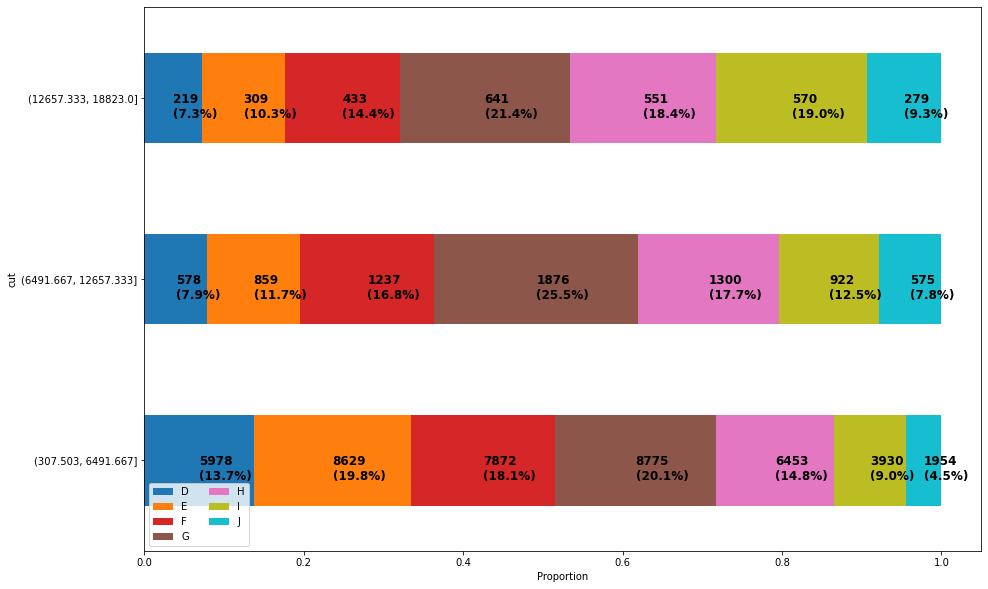

In [44]:
cross_tab_prop.plot(kind='barh', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(15, 10))

plt.legend(loc="lower left", ncol=2)
plt.ylabel("cut")
plt.xlabel("Proportion")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

In [46]:
diamond_df.corr()['price']

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

<AxesSubplot:>

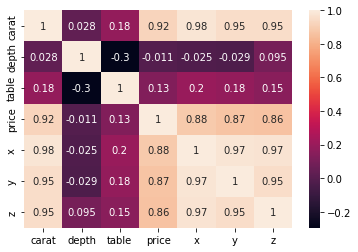

In [47]:
sns.heatmap(diamond_df.corr(),annot= True)

In [52]:
diamond_df

,carat,cut,color,clarity,depth,table,price,x,y,z,price_bin
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,"(307.503, 6491.667]"
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"(307.503, 6491.667]"
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,"(307.503, 6491.667]"
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"(307.503, 6491.667]"
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"(307.503, 6491.667]"
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,"(307.503, 6491.667]"
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,"(307.503, 6491.667]"
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,"(307.503, 6491.667]"
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,"(307.503, 6491.667]"


In [56]:
diamond_df.select_dtypes('category')

,cut,color,clarity,price_bin
0,Ideal,E,SI2,"(307.503, 6491.667]"
1,Premium,E,SI1,"(307.503, 6491.667]"
2,Good,E,VS1,"(307.503, 6491.667]"
3,Premium,I,VS2,"(307.503, 6491.667]"
4,Good,J,SI2,"(307.503, 6491.667]"
...,...,...,...,...
53935,Ideal,D,SI1,"(307.503, 6491.667]"
53936,Good,D,SI1,"(307.503, 6491.667]"
53937,Very Good,D,SI1,"(307.503, 6491.667]"
53938,Premium,H,SI2,"(307.503, 6491.667]"


In [66]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = diamond_df[['carat', 'depth', 'table','z']]
# the calculation of variance inflation requires a constant
X['intercept'] = 1

# create dataframe to store vif values
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

C:\Users\kiran kumar\AppData\Local\Temp\ipykernel_16760\406662864.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


In [59]:
diamond_df.select_dtypes('number').columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [67]:
vif

,Variable,VIF
0,carat,11.525886
1,depth,1.156953
2,table,1.141078
3,z,11.571490
4,intercept,3542.889338


C:\Users\kiran kumar\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


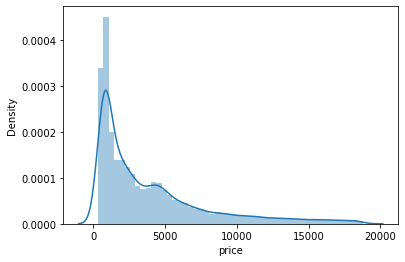

In [70]:
sns.distplot(diamond_df['price']);

C:\Users\kiran kumar\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


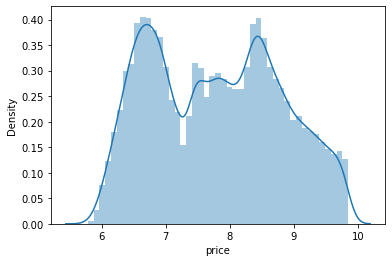

In [71]:
sns.distplot(np.log(diamond_df['price']));

In [72]:
diamond_df['log_price'] = np.log(diamond_df['price'])

In [74]:
diamond_df['exp_price'] = np.exp(diamond_df['log_price'])

In [76]:
diamond_df[['price','log_price']].describe()

,price,log_price
count,53940.000000,53940.000000
mean,3932.799722,7.786768
std,3989.439738,1.014649
min,326.000000,5.786897
25%,950.000000,6.856462
50%,2401.000000,7.783641
75%,5324.250000,8.580027
max,18823.000000,9.842835


In [41]:
diamond_df['price'].median()

2401.0

In [42]:
diamond_df['new_price'] = diamond_df['price'].apply(lambda x: 'above' if x > diamond_df['price'].median() else 'below')

In [44]:
diamond_df['new_table'] = diamond_df['table'].apply(lambda x: 't_above' if x > diamond_df['table'].median() else 't_below')

KeyboardInterrupt: 

In [ ]:
diamond_df

In [ ]:
cross_tab = pd.crosstab(diamond_df['new_price'],diamond_df['new_table'])

In [ ]:
stat,p_val, dof,ex_fre = stats.chi2_contingency(cross_tab)

In [ ]:
p_val,dof

In [ ]:
if p_val < 0.05:
    print('Reject H0: Both columns are dependent')
else:
    print('Failed Reject H0: Both columns are independent')
    

In [ ]:
tennis = pd.read_csv('tennis.csv')
tennis

In [ ]:
tennis.describe()

In [ ]:
tennis_crosstab = pd.crosstab(tennis['play'],tennis['windy'])
tennis_crosstab

In [ ]:
stat,p,dof,exp = stats.chi2_contingency(tennis_crosstab)

In [ ]:
stat, exp

In [ ]:
conf = 0.95
stats.chi2.ppf(((1-conf)/2) + conf,1)

In [ ]:
p

In [ ]:
if p < 0.05:
    print('Reject H0: windy and play columns are dependent')
else:
    print('Failed Reject H0: windy and play columns are independent')
    

In [ ]:
def chisquare_test_result(data,col):    
    data_crosstab = pd.crosstab(data['play'],data[col])
    stat,p,dof,exp = stats.chi2_contingency(data_crosstab)
    print('p-value: ',p)
    if p < 0.05:
        print('Reject H0: {} and play columns are dependent'.format(col))
    else:
        print('Failed Reject H0: {} and play columns are independent'.format(col))


In [ ]:
for col in tennis.columns:
    print(chisquare_test_result(tennis,col))

### Measures of Relation

$ correlation(r) = \frac {cov(x,y)} {std(x) * std(y)} $

In [ ]:
diamond_df[['table','price']].cov()

In [ ]:
np.round(diamond_df.corr()['price'] *100,2)

In [ ]:
sns.regplot(diamond_df['price'],diamond_df['carat'])

In [ ]:
sns.regplot(diamond_df['depth'],diamond_df['price'])

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(diamond_df.corr(),annot=True)

#### Probability plot to check the normality of your column

scipy.stats.probplot(x, sparams=(), dist='norm', fit=True, plot=None, rvalue=False)

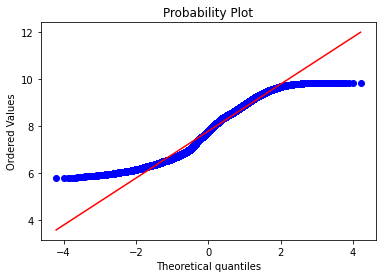

In [51]:
stats.probplot(np.log(diamond_df['price']),plot = plt);

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


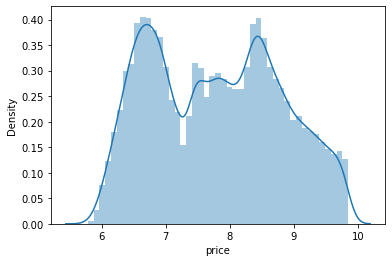

In [52]:
sns.distplot(np.log(diamond_df['price']));

In [49]:
test = pd.read_excel('Chi_test.xlsx')
test = test.set_index('Unnamed: 0')

In [50]:
stats.chi2_contingency(test)

(16.390246791192737,
 0.6921380051912838,
 20,
 array([[ 8.40909091, 12.44545455,  2.35454545, 10.42727273,  1.68181818,
          1.68181818],
        [ 4.54545455,  6.72727273,  1.27272727,  5.63636364,  0.90909091,
          0.90909091],
        [ 7.27272727, 10.76363636,  2.03636364,  9.01818182,  1.45454545,
          1.45454545],
        [ 3.40909091,  5.04545455,  0.95454545,  4.22727273,  0.68181818,
          0.68181818],
        [ 1.36363636,  2.01818182,  0.38181818,  1.69090909,  0.27272727,
          0.27272727]]))